# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read the CSV file

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
df.shape

(9990, 60)

In [ ]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
df = df.drop(labels='filename',axis=1)

# Audio files

In [ ]:
audio_recording = "/content/drive/MyDrive/Data/genres_original/classical/classical.00000.wav"
data, sr = librosa.load(audio_recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio_recording, sr=45600)

(array([-0.01926671, -0.02469446, -0.01804996, ...,  0.03510522,
         0.0300073 ,  0.01493309], dtype=float32),
 45600)

In [ ]:
import IPython
IPython.display.Audio(data, rate=sr)

# Plot Raw Wave Files

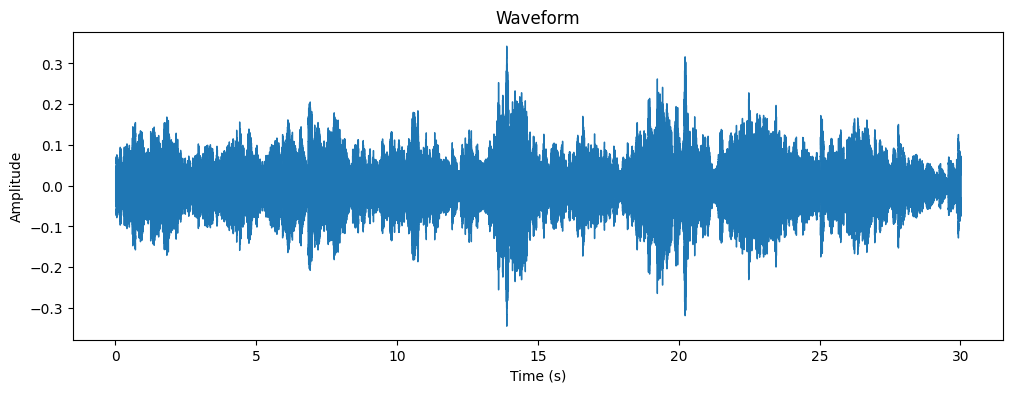

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


# Spectograms

<ipython-input-11-6ff8b0ee93be>:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')


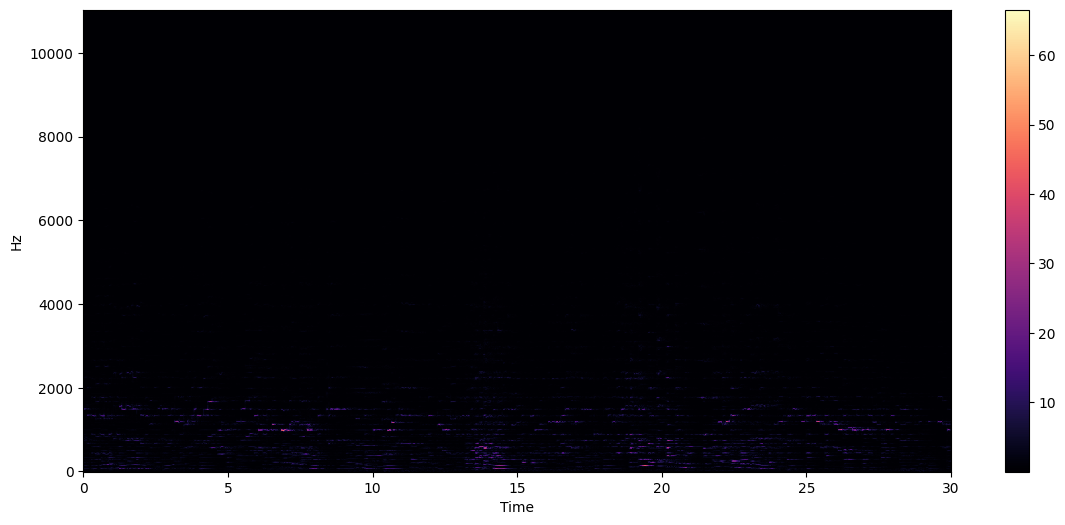

In [ ]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

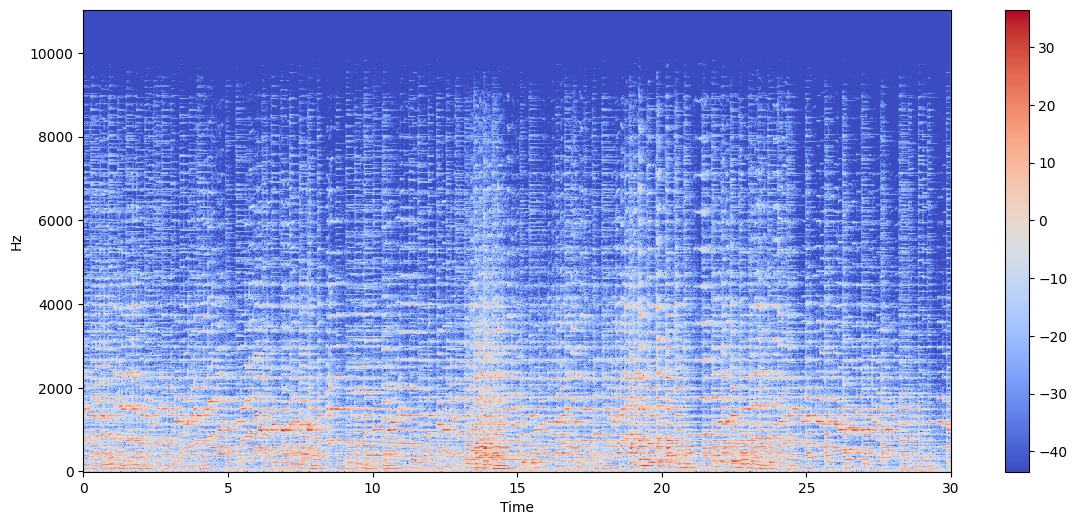

In [ ]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Spectral Rolloff

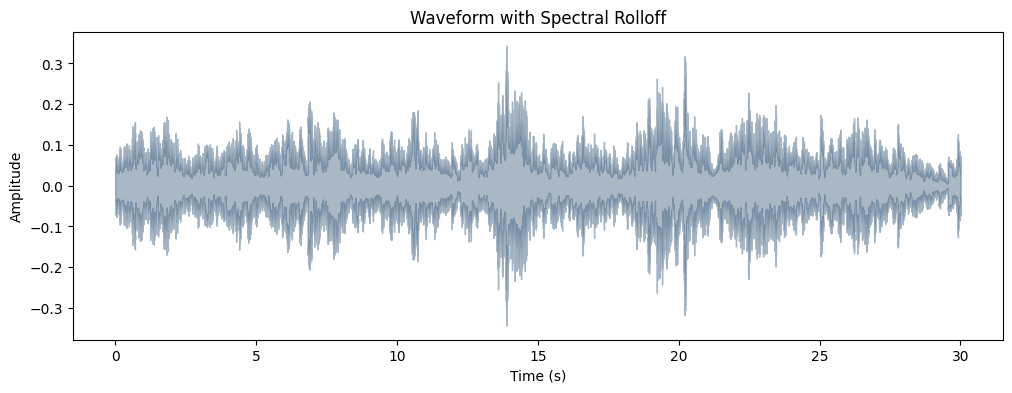

In [ ]:
# Compute spectral rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=data, sr=sr)[0]

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color='#2B4F72')
plt.title('Waveform with Spectral Rolloff')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Chroma Feature

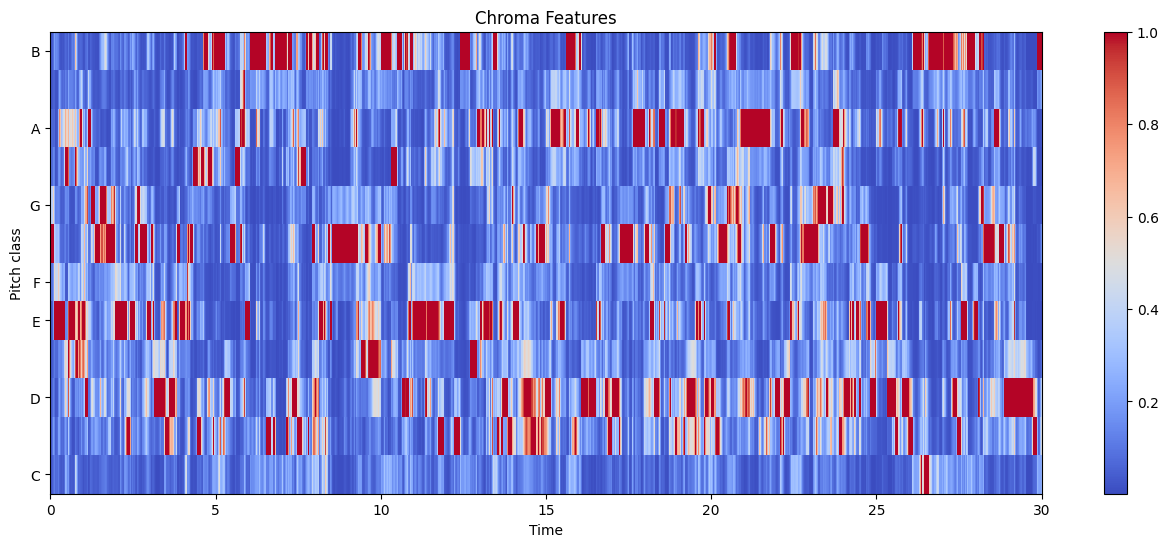

In [ ]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(y=data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma Features')
plt.show()

# Zero crossing Rate

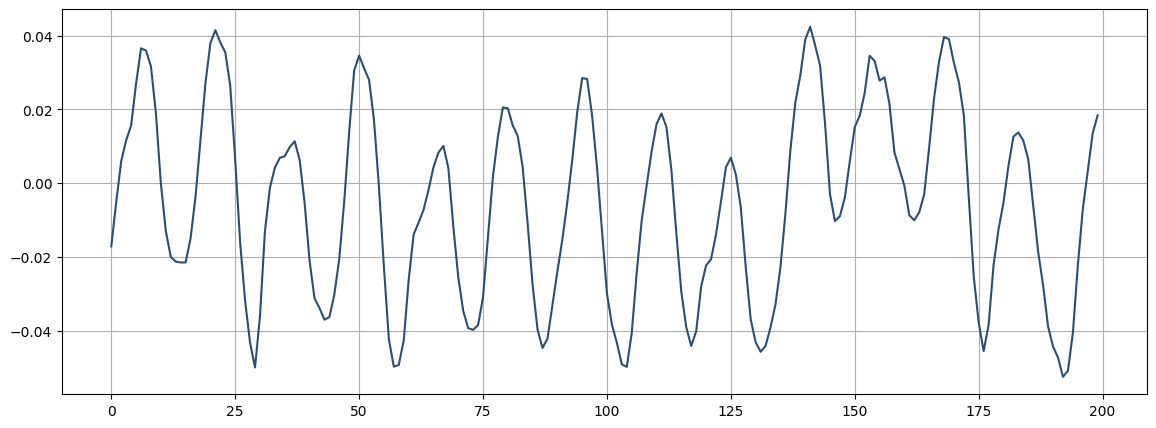

In [ ]:
start = 1000
end = 1200
plt.figure(figsize=(14, 5))
plt.plot(data[start:end], color='#2B4F72')
plt.grid()

In [ ]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print('The number  of zeero crossings is: ', sum(zero_cross_rate))

The number  of zeero crossings is:  27


# Feature Extraction

In [ ]:
class_list = df.iloc[:, -1]
convertor = LabelEncoder()

In [ ]:
y = convertor.fit_transform(class_list)

In [ ]:
print(df.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

# Scaling the Features

In [ ]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
len(y_train), len(y_test), len(X_train), len(X_test)

(6693, 3297, 6693, 3297)

# Building the Model

In [ ]:
from keras.models import Sequential
from tensorflow import keras as k

In [ ]:
def trainModel(model, epochs, optimizer):
  batch_size = 128
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics = 'accuracy')
  return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

In [ ]:
def Validation(history):
  print('Validation Accuracy',max(history.history['val_accuracy']))
  pd.DataFrame(history.history).plot(figsize=(12, 6))
  plt.show()

In [ ]:
model = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(10, activation='softmax')
])
print(model.summary())
model_history = trainModel(model=model, epochs=300, optimizer='Adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print('The test loss is: ', test_loss)
print('\n The best test accuracy is: ', test_acc*100)

26/26 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.9126
The test loss is:  0.5601439476013184

 The best test accuracy is:  91.26478433609009


In [ ]:
# Feature testing
#import librosa

# Load audio file
#audio_file = 'example_audio.wav'
#y, sr = librosa.load(audio_file)

# Extract MFCC features
#mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Display shape of MFCCs
#print("MFCCs Shape:", mfccs.shape)


In [ ]:
# Save the model in HDF5 format
model.save('classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model from SavedModel format
loaded_model = tf.keras.models.load_model('classifier_model.h5')

In [ ]:
loaded_model.evaluate(X_test, y_test)

104/104 [==============================] - 1s 3ms/step - loss: 0.5601 - accuracy: 0.9126


[0.5601440668106079, 0.9126478433609009]